# Projeto 2 - Ciência dos Dados

    Alunos: 
        
        Letícia Coêlho Barbosa

        Matheus Silva Melo de Oliveira

## Contextualização

------------------------------------------------------------

Atualmente, navegar no meio cibernético tornou-se uma comunalidade, ficou mais fácil para os usuários navegarem, se comunicarem, compartilharem informações. Entretanto, essa nova realidade também trás ameaças. A disseminação de vírus, os ataques de hackers a todo tipo de máquina, seja pessoal ou corporativa, estão maiores do que nunca.

Para defender os nossos queridos celulares/tablets/computadores existem diversos programas e ferramentas que se propõem a defender o seu sistema, uma dessas técnicas utilizadas com esse objetivo é conhecida como Firewall.

De acordo com o tamanho da rede, a quantidade de dados produzidos pelos usuários na rede pode ser muito grande.
Dispositivos de firewall em uma rede podem permitir ou impedir tráfego de acordo com a política usada examinando o
dados. A configuração de firewalls é vital para a comunicaçãoredes funcionem de forma adequada e segura.Firewalls agem como controle portas para redes de computadores.

Entendendo a sua importância como "barreira" para o fluxo de dados, o Firewall é o responsável pelo controle dos dados transferidos de e para o seu computador através da internet, além de prevenir que informações pessoais ou confidenciais sejam transmitidas pelo seu computador para a internet e impedir a invasão da máquina por software malicioso.

Portanto, o objetivo desse projeto é classificar e tentar prever, atraves das características da transação (Portas destino e cliente , Número de bytes total, entre outros), se determinada transação de dados será aceita ou negada/impedida pelo computador.

<br>
<center><img src="firewall_assets/firewall.gif" width=500 style="float: center; margin: 0px 0px 10px 10px"></center>

### Entendendo a base de dados utilizada

* `Source Port`: Client Source Port - Geralmente apenas um arquivo executável que foi modificado a partir do código de fonte do programa original e substitui o executável original, para que possa ser rodado em uma outra plataforma para a qual não foi originalmente escrito


* `Destination Port`: Destination Port Client Destination Port - Para protocolos de aplicativos bem definidos, foram definidas portas bem conhecidas.  Os serviços só podem ser escutados em portas específicas.

A lista de portas conhecidas é mantida pela IANA(Acesse para saber mais: https://www.iana.org/assignments/service-names-port-numbers/service-names-port-numbers.xhtml)


* `NAT Source Port`: Porta de origem de tradução de endereço de rede. 


* `NAT Destination Port`: Porta de destino de tradução de endereço de rede.

     Em redes de computadores, Network Address Translation (NAT),  é uma técnica que consiste em reescrever, utilizando-se de uma tabela hash, os endereços IP de origem de um pacote que passam por um router (ou firewall) de maneira que um computador de uma rede interna tenha acesso a Rede Mundial de Computadores.
     
<br>
<center><img src="firewall_assets/Network_Address_Translation_(NAT).png" width=700 style="float: center; margin: 0px 0px 10px 10px"></center>
     

* `Bytes`: Número total de de Bytes da transação/pedido. 


* `Bytes Sent`: Número total de de Bytes enviados da transação/pedido.


* `Bytes Received`: Número total de de Bytes erecebidos da transação/pedido.


* `Packets`: Número total de pacotes. Pacotes são uma estrutura unitária de transmissão de dados ou uma sequência de dados transmitida por uma rede ou linha de comunicação que utilize a comutação de pacotes. A informação a transmitir  é quebrada em inúmeros pacotes e então transmitida. Além da parte da informação, o pacote possui um cabeçalho, que contém informações importantes para a transmissão, como o endereço do destinatário.

* `Elapsed Time (sec)`: Tempo decorrido para a transação/fluxo


* `pkts_sent`: Pacotes Enviados.


* `pkts_received`: Pacotes Recebidos.


* `Action`:  `Allow` (permite o  tráfego da Internet), `Deny` (Bloqueia o tráfego e impõe a ação negar de forma padrão para

     o aplicativo que está sendo negado), `Drop` (Silenciosamente diminui o tráfego. A TCP reset não é enviada para o host 
     
     ou para a aplicação), `Reset-Both` (Envia uma redefinição de TCP para os dispositivos do lado do cliente e do lado do 
     
     servidor.) 
     
<br>
<center><img src="firewall_assets/fire_packet.gif" width=400 style="float: center; margin: 0px 0px 10px 10px"></center>
<br>

Alguns termos importantes para a melhor compreensão do tema:

`TCP` (Transmission Control Protocol) e `IP` (Internet Protocol):  é um conjunto de protocolos de comunicação. Ele tem por objetivo padronizar todas as comunicações de rede, principalmente as comunicações na web.


`Portas`: portas lógicas para garantir que a aplicação (software) que iniciou a conversação encontrará no seu destino a aplicação desejada. São canais virtuais aleatórios que se abrem conforme o tipo de aplicação executando, como por exemplo, o HTTP utiliza a porta 80. Elas evitam que a informação seja direcionada erroneamente para outra aplicação.

## Bibliotecas

------------------------------------------------------------


In [20]:
import numpy as np
import pandas as pd
import time
from scipy import stats 
# plots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

## Carregando Base de Dados

------------------------------------------------------------


In [2]:
filename = 'firewall_assets/log2.csv'

dados=pd.read_csv(filename)
dados.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [3]:
# Mostrando colunas

dados.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [4]:
dados['Source Port'].value_counts()

58638    840
27005    513
443      273
57470    222
49418    210
        ... 
63182      1
61133      1
52937      1
1712       1
47111      1
Name: Source Port, Length: 22724, dtype: int64

In [22]:
categoricos = dados.iloc[:,:4]
alvo = dados.iloc[:,4]
numericos = dados.iloc[:,5:]

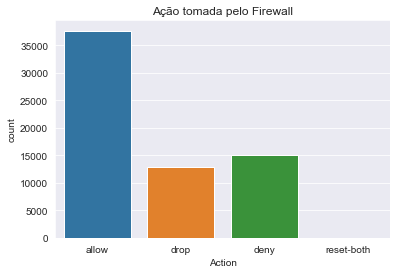

In [6]:
sns.set_style(style="darkgrid")

sns.countplot(dados.Action)
plt.title('Ação tomada pelo Firewall')
plt.show()

# tips = sns.load_dataset("tips")
# ax = sns.barplot(x="day", y="total_bill", data=tips)

# dados.Action.value_counts().plot(kind='bar',color='red',edgecolor='black')
# plt.title('Ação tomada pelo Firewall')
# plt.show()

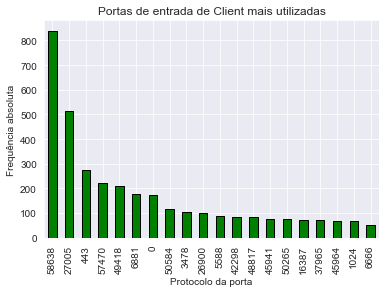

In [7]:
dados['Source Port'].value_counts()[0:20].plot(kind='bar',color='green',edgecolor='black')
plt.title('Portas de entrada de Client mais utilizadas')
plt.ylabel('Frequência absoluta')
plt.xlabel('Protocolo da porta')
plt.show()

#### Como vê-se no gráfico acima, as portas de entrada ou 'fonte' mais utilizadas no dataset, em geral são localizadas entre as portas 1024-65535, que são conhecidas como portas em geral regidas ou por organizações que possuem domínio web ou portas por clientes programacionais como browsers. Isso reforça o fato, de que a maioria das ações analisadas de um firewall ocorrem sobretudo em ações mais pessoais do que as regidas por processos protocolares do próprio computador.

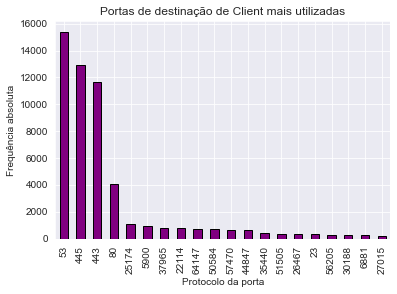

In [9]:
dados['Destination Port'].value_counts()[0:20].plot(kind='bar',color='purple',edgecolor='black')
plt.title('Portas de destinação de Client mais utilizadas')
plt.ylabel('Frequência absoluta')
plt.xlabel('Protocolo da porta')
plt.show()

#### Por outro lado, nas portas de destinação mais analisadas por Firewalls, as portas com números localizados entre 0-1024, também se mostram com grande aparição, mostrando que nesse escopo, as ações analisadas não se restringem somente as ações executadas pelo usuário, mas também ações protocolores de softwares internos.

In [10]:
normalizing = lambda x: np.log10(1+x)

#### A função 'normalizing' foi criada para facilitar a vizualização da plotagem dos dados, vistos que os valores das colunas Bytes e Packets possuem grandes variações. Dessa forma a representação desses dados na base 10, possibilitará melhor analise da distribuição.

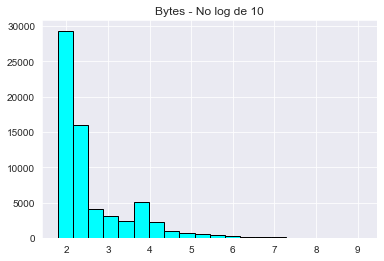

In [11]:
plt.hist(normalizing(dados['Bytes']), bins=20,color='cyan',edgecolor='black')
plt.grid(True)
plt.title('Bytes' + ' - No log de 10')
plt.show()

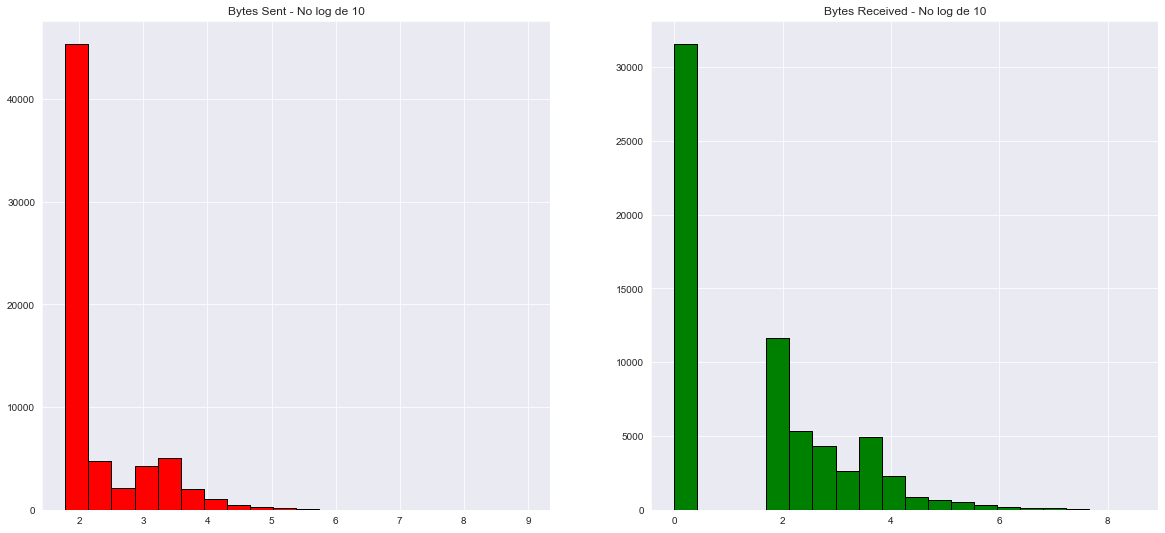

In [12]:
plt.figure(figsize=(20,9))
plt.subplot(121)
plt.hist(normalizing(dados['Bytes Sent']), bins=20,color='red',edgecolor='black')
plt.grid(True)
plt.title('Bytes Sent' + ' - No log de 10')

plt.subplot(122)
plt.hist(normalizing(dados['Bytes Received']), bins=20,color='green',edgecolor='black')
plt.grid(True)
plt.title('Bytes Received' + ' - No log de 10')
plt.show()

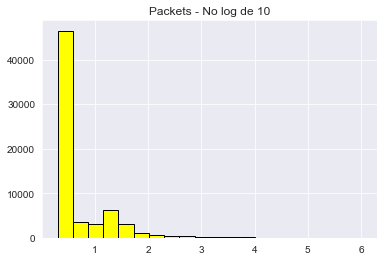

In [13]:
plt.hist(normalizing(dados['Packets']), bins=20,color='yellow',edgecolor='black')
plt.grid(True)
plt.title('Packets' + ' - No log de 10')
plt.show()

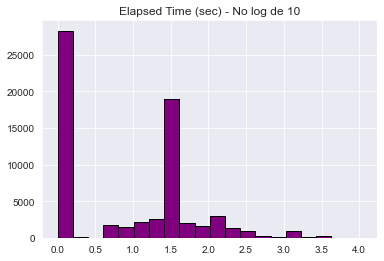

In [14]:
plt.hist(normalizing(dados['Elapsed Time (sec)']), bins=20,color='purple',edgecolor='black')
plt.grid(True)
plt.title('Elapsed Time (sec)' + ' - No log de 10')
plt.show()

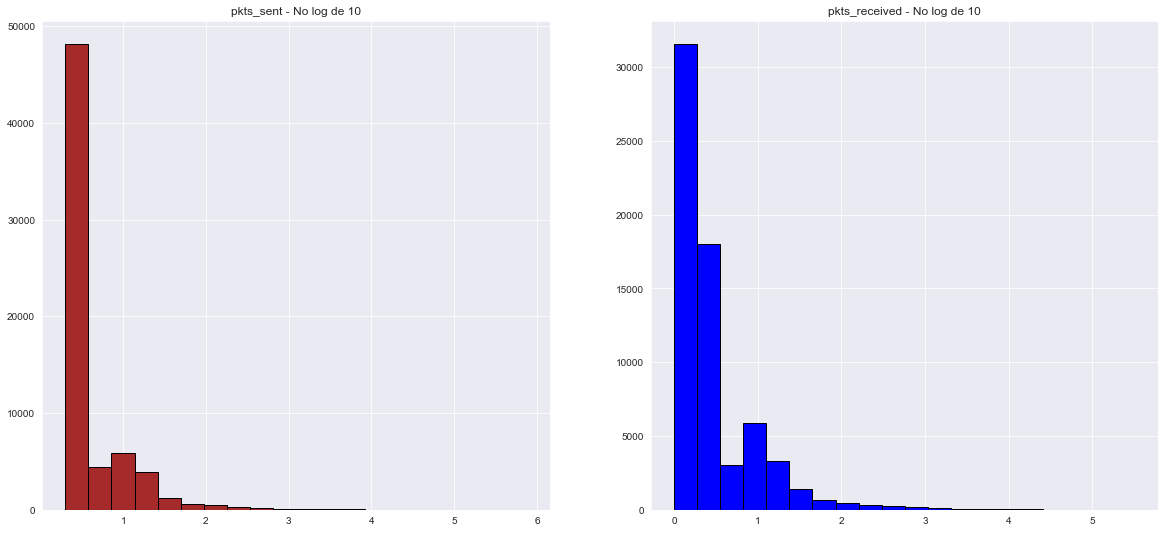

In [15]:
plt.figure(figsize=(20,9))
plt.subplot(121)
plt.hist(normalizing(dados['pkts_sent']), bins=20,color='brown',edgecolor='black')
plt.grid(True)
plt.title('pkts_sent' + ' - No log de 10')

plt.subplot(122)
plt.hist(normalizing(dados['pkts_received']), bins=20,color='blue',edgecolor='black')
plt.grid(True)
plt.title('pkts_received' + ' - No log de 10')

plt.show()

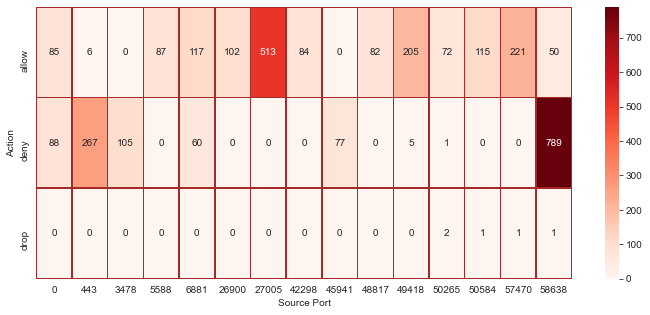

In [16]:
melhores_analise = dados[dados['Source Port'].isin(dados['Source Port']
                                          .value_counts()[0:15].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['Source Port'])
plt.figure(figsize=(12,5))
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Reds',
            linecolor='brown',
            linewidths=0.5)
plt.show()

#### Analisando o crosstab, observamos que a Source Port 27005 e 58638 apresentam , em sua maioria, ações mais imediatas de permissão e negação respectivamente.

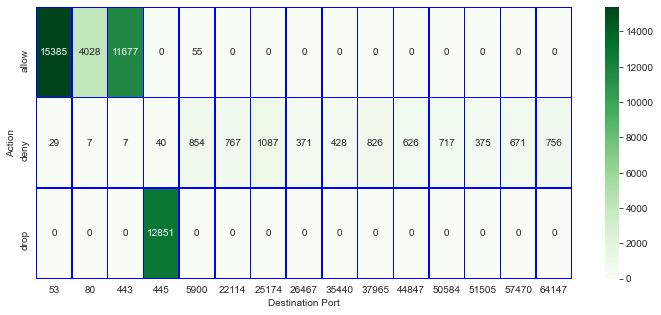

In [17]:
melhores_analise = dados[dados['Destination Port'].isin(dados['Destination Port']
                                          .value_counts()[0:15].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['Destination Port'])
plt.figure(figsize=(12,5))
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Greens',
            linecolor='blue',
            linewidths=0.5)
plt.show()

#### Analisando o crosstab, observamos que a Destination Port 53, 80, 443 e 445, possuem ações imediatas onde as 3 primeiras são majoritariamente aceitas e a última comumentemente negada.

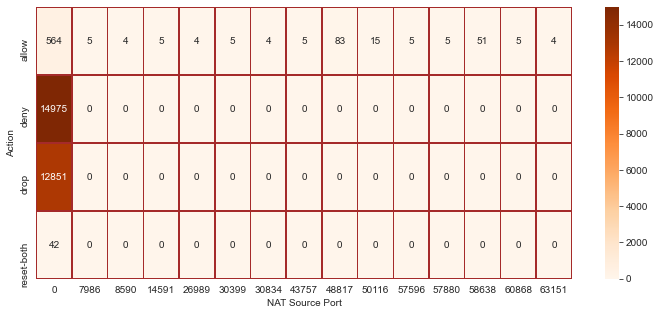

In [18]:
melhores_analise = dados[dados['NAT Source Port'].isin(dados['NAT Source Port']
                                          .value_counts()[0:15].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['NAT Source Port'])
plt.figure(figsize=(12,5))
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Oranges',
            linecolor='brown',
            linewidths=0.5)
plt.show()

#### Analisando o crosstab, observamos que a NAT Source Port 0, possuem ações que se dividem majoritariamente entre deny e drop, possuindo poucas ações permitdas.

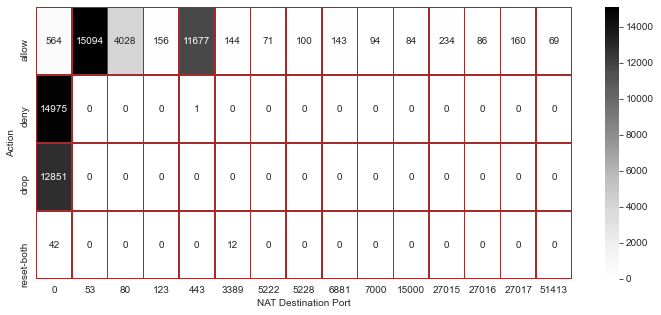

In [19]:
melhores_analise = dados[dados['NAT Destination Port'].isin(dados['NAT Destination Port']
                                          .value_counts()[0:15].index.to_list())]
cmp = pd.crosstab(melhores_analise.Action, melhores_analise['NAT Destination Port'])
plt.figure(figsize=(12,5))
sns.heatmap(cmp, annot=True, fmt='d', 
            cmap='Greys',
            linecolor='brown',
            linewidths=0.5)
plt.show()

In [ ]:
#### Analisando o crosstab, observamos que a NAT Destination Port 0, há divisão de ação entre drop e deny , Port 53, 80 e 443 possuem ação majoritariamente allow.

##### Vamos agora entender a importância dos features para o modelo, isto é a relevãncia de cada um dos atributos de acordo com sua relevância para a ação tomada pelo Firewall.

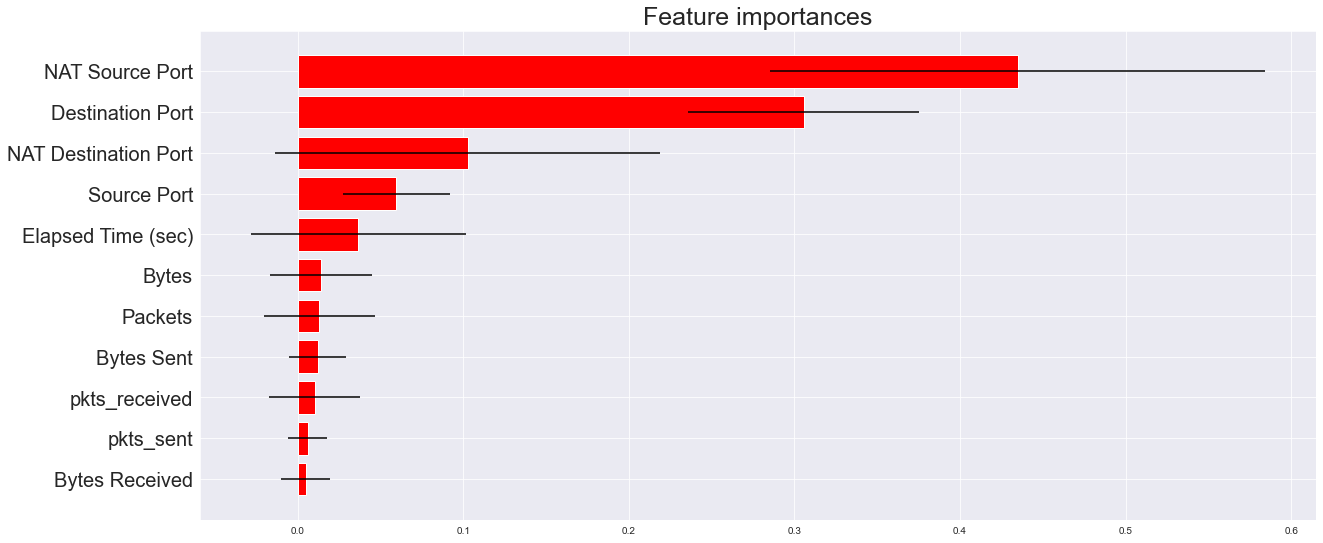

In [69]:
#Fazendo seleção dos atributos utilizados
features = dados.copy()
action = dados.Action
features = features.drop('Action',axis=1)
X, y = features,action


# Construindo uma floresta que estima a importância de cada atributo
floresta = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

#Treinando o semi modelo
floresta.fit(X, y)
importancias = floresta.feature_importances_
desvio = np.std([tree.feature_importances_ for tree in floresta.estimators_],
             axis=0)
indices = np.argsort(importancias)

#Traduzindo os indices numéricos para os nomes no dataset
index=[]
for i in indices:
    index.append(features.iloc[:,i].name)
    
# Plota o nível de importância de cada atributo para o modelo
plt.figure(figsize=(20,9))
plt.title("",size=25)
plt.barh(range(X.shape[1]), importancias[indices],
       color="r", xerr=desvio[indices], align="center")
plt.yticks(range(X.shape[1]),index,size=20)
plt.ylim([-1, X.shape[1]])
plt.show()

In [94]:
allow = dados[dados.Action == 'allow']
deny =  dados[dados.Action == 'deny']
drop =  dados[dados.Action == 'drop']
reset_both =  dados[dados.Action == 'reset-both']
m = [allow,deny,drop,reset_both]

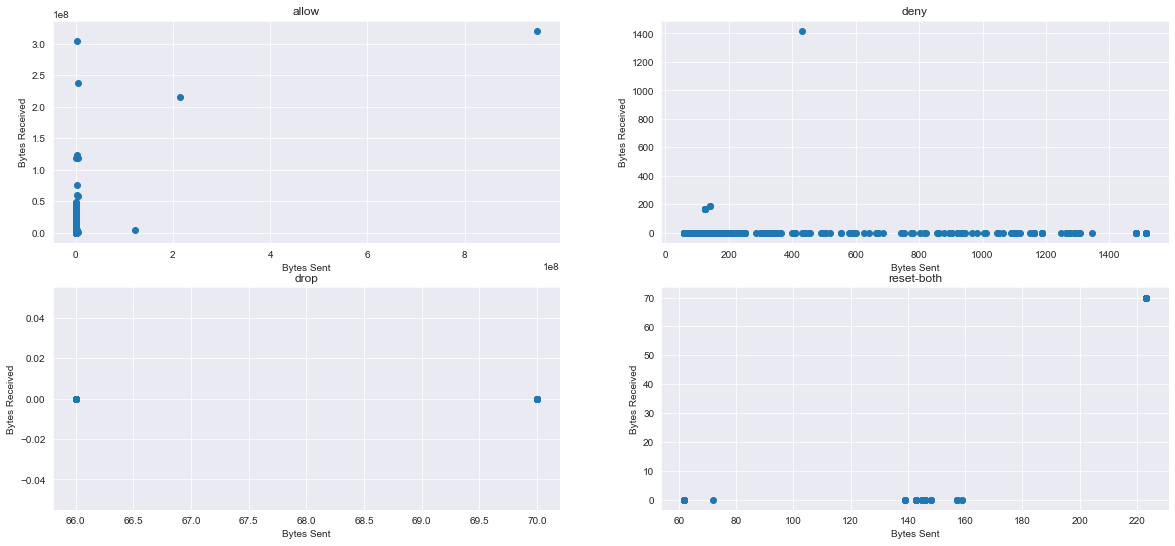

In [86]:
plt.figure(figsize=(20,9))
for data,number,name in ([allow,1,'allow'],[deny,2,'deny'],[drop,3,'drop'],
                         [reset_both,4,'reset-both']):
    plt.subplot(2,2,number)                     
    plt.scatter(data['Bytes Sent'],data['Bytes Received'])
    plt.title(name)
    plt.xlabel('Bytes Sent')
    plt.ylabel('Bytes Received')
plt.show()                         

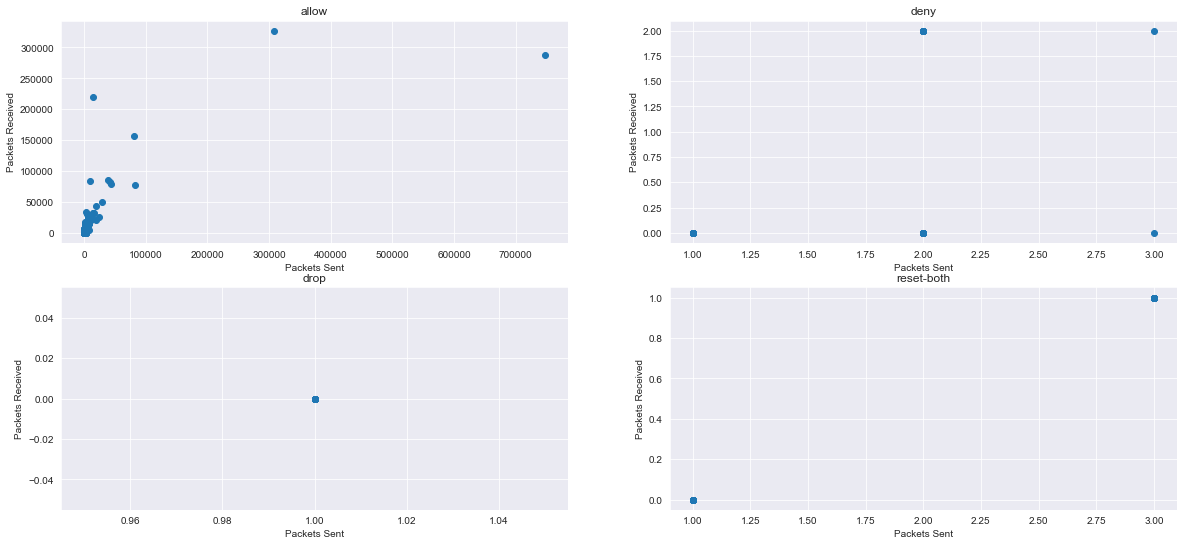

In [88]:
plt.figure(figsize=(20,9))
for data,number,name in ([allow,1,'allow'],[deny,2,'deny'],[drop,3,'drop'],
                         [reset_both,4,'reset-both']):
    plt.subplot(2,2,number)                     
    plt.scatter(data['pkts_sent'],data['pkts_received'])
    plt.title(name)
    plt.xlabel('Packets Sent')
    plt.ylabel('Packets Received')
plt.show()      

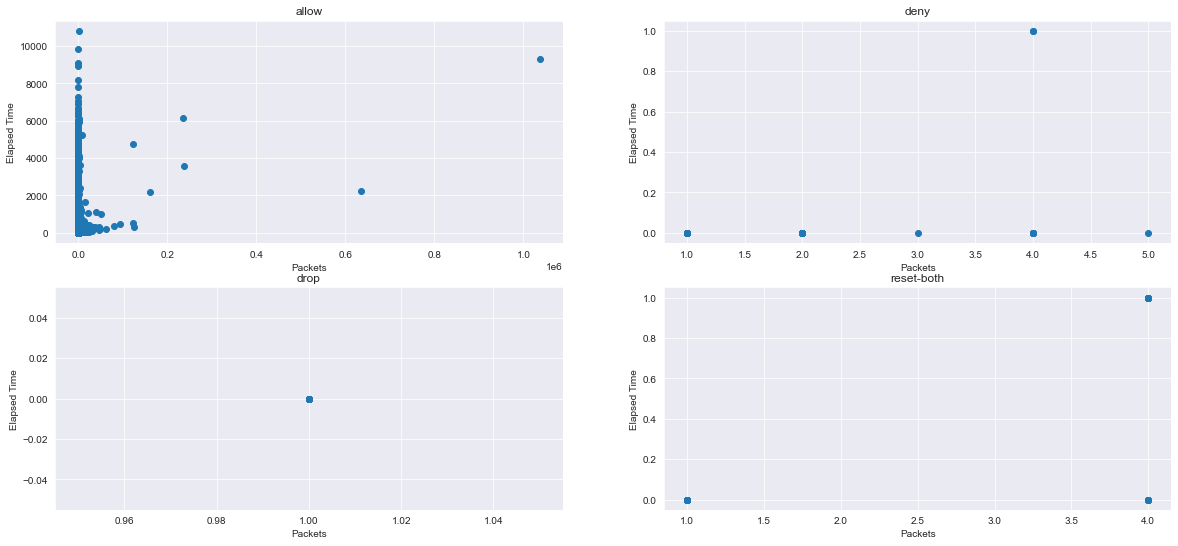

In [89]:
plt.figure(figsize=(20,9))
for data,number,name in ([allow,1,'allow'],[deny,2,'deny'],[drop,3,'drop'],
                         [reset_both,4,'reset-both']):
    plt.subplot(2,2,number)                     
    plt.scatter(data['Packets'],data['Elapsed Time (sec)'])
    plt.title(name)
    plt.xlabel('Packets')
    plt.ylabel('Elapsed Time')
plt.show()      


#Link para refrenciar depois: https://pt.wikipedia.org/wiki/Source_port#:~:text=Source%20port%20%C3%A9%20a%20portabiliza%C3%A7%C3%A3o,qual%20n%C3%A3o%20foi%20originalmente%20escrito. 

https://www.pcmag.com/encyclopedia/term/tcpip-port#:~:text=Destination%20Ports%20Are%20Server%20Applications&text=For%20example%2C%20all%20port%2080,such%20as%20Skype%20and%20BitTorrent.

https://www.infonova.com.br/artigo/o-que-e-tcp-ip-e-como-funciona/#:~:text=O%20TCP%20%C3%A9%20um%20protocolo,sequ%C3%AAncia%20pelo%20qual%20foram%20enviados.

https://pt.wikipedia.org/wiki/Network_address_translation

https://pt.wikipedia.org/wiki/Pacote